## Generating data

Using the following equation to generate data for linear regression

$y = -2 + 0.93x_1 + 0.5ϵ$

In [35]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [36]:
np.random.seed(45)
n = 5000
alpha = -2
beta = 0.93
epsilon = np.random.randn(n)
x = np.linspace(0,10,n)
y_noise = alpha + beta * x + 0.5*epsilon
y = alpha + beta * x

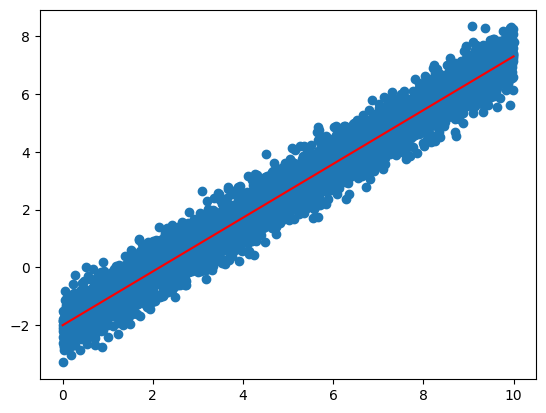

In [37]:
plt.scatter(x,y_noise)
plt.plot(x,y,color = 'r')
plt.show()

Using just the sampled data to fit a regression model

In [38]:
X = sm.add_constant(x)

In [39]:
X[:5,:]

array([[1.       , 0.       ],
       [1.       , 0.0020004],
       [1.       , 0.0040008],
       [1.       , 0.0060012],
       [1.       , 0.0080016]])

In [40]:
model = sm.OLS(y_noise,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.464e+05
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        08:28:19   Log-Likelihood:                -3614.1
No. Observations:                5000   AIC:                             7232.
Df Residuals:                    4998   BIC:                             7245.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0177      0.014   -143.092      0.0

1. The estimated coefficients are similar to the ones used for generating the data. There is some difference due to the presence of noise in the samples.
2. both coefficients are associated with p-values below 0.001 (check the column named P>|t|), which indicates that they are statistically significant at the customary p < .05 level.

### Plotting

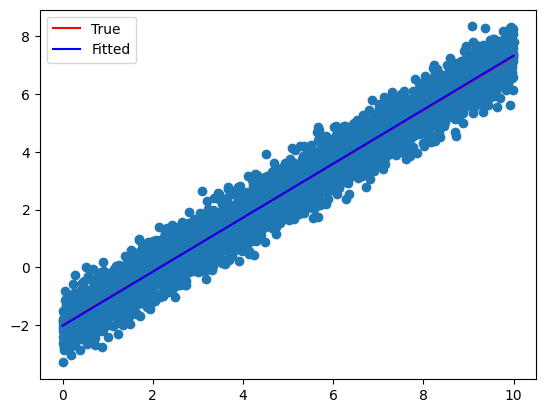

In [41]:
plt.scatter(x,y_noise)
plt.plot(x,y,color = 'r', label = 'True')
plt.plot(x,results.fittedvalues,color = 'b', label = 'Fitted')
plt.legend()
plt.show()

Please note:
1. You can fit other kinds of regression models as well such as:
$y = \beta_0 + \beta_1x + \beta_2log(x)$
2. You can also including interactions, in case you have multiple independent variables
$y = \beta_0 + \beta_1x_1 + \beta_2x_1x_2$

### Reversing the order

Fitting:

$x = \beta_0 + \beta_1y$

In [42]:
Y_noise = sm.add_constant(y_noise)
model = sm.OLS(x,Y_noise)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.464e+05
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        08:29:13   Log-Likelihood:                -3869.3
No. Observations:                5000   AIC:                             7743.
Df Residuals:                    4998   BIC:                             7756.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2531      0.010    218.214      0.0

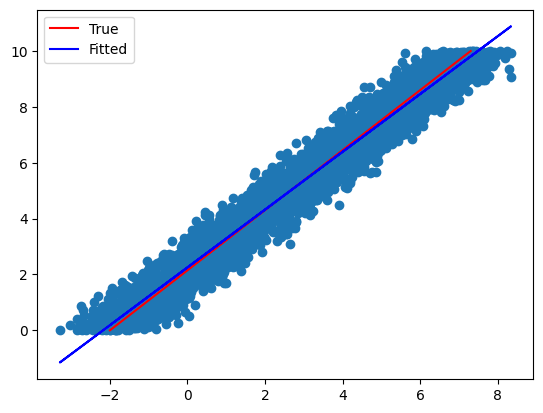

In [43]:
plt.scatter(y_noise,x)
plt.plot(y,x,color = 'r', label = 'True')
plt.plot(y_noise,results.fittedvalues,color = 'b', label = 'Fitted')
plt.legend()
plt.show()